In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


## Subcircuit 1

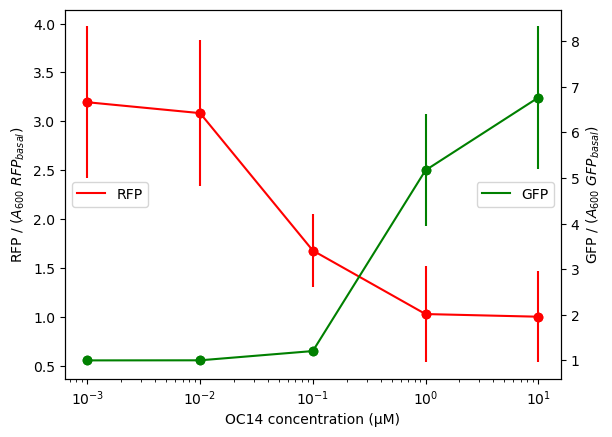

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [2]:
def plotData(inducer, rfpExp_list, gfpExp_list, semRed, semGreen,pad=0.01, inducerName='OC14'):
    fig,ax = plt.subplots()

    ax.plot(inducer,rfpExp_list,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer,gfpExp_list,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')

    ax.set_xlabel(f'{inducerName} concentration (µM)')

    plt.show()




doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/nonTransferred_subcircuit1_circuit14_doseResponseOC14_-0.5ATC.pkl','rb'))
# doseResponseExp = pkl.load(open('input/liquid_culture/curatedData/subcircuit1_circuit14_doseResponseOC14_maxATC.pkl','rb'))
OC14_list = np.array(doseResponseExp['OC14']); gfpExp_list = list(doseResponseExp['mean_gfp']); rfpExp_list = list(doseResponseExp['mean_rfp'])
semGreen = doseResponseExp['std_gfp']; semRed = doseResponseExp['std_rfp']


plotData(OC14_list, rfpExp_list, gfpExp_list, semRed, semGreen)
OC14_list

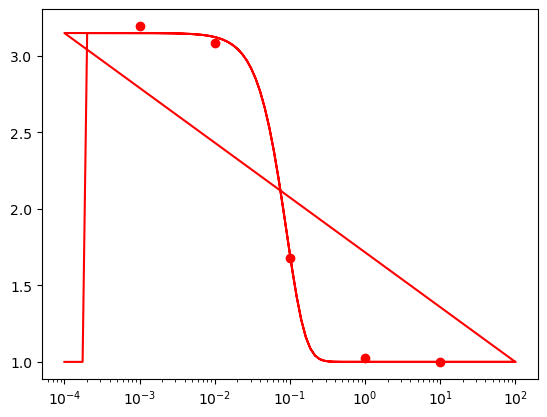

In [85]:
import scipy.optimize as optimization
def gfp_steadystate(OC14, Vf,Kvd,Ve,Kfe): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=8
    F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    return F

def rfp_steadystate(OC14, Vf,Kvd,Ve,Kfe): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=8

    E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E


def steadystate(OC14, Vf,Kvd,Ve,Kfe):
  F = gfp_steadystate(OC14[:5],  Vf,Kvd,Ve,Kfe)
  E = rfp_steadystate(OC14[5:],Vf,Kvd,Ve,Kfe)
  FE = np.hstack([F,E])

  return FE


FEdata = np.hstack([gfpExp_list,rfpExp_list])
OC14data_new = np.hstack([OC14_list,OC14_list])
OC14data_continuous= np.hstack([OC14_continuous,OC14_continuous])

popt, pcov = optimization.curve_fit(f=steadystate, xdata=OC14data_new, ydata=FEdata ,p0=[ 7,0.5,3,3],bounds = (0,10000), maxfev = 100000000)

# gfpFit, rfpFit = steadystate(OC14data_new, *popt)
fluorescenceFit = steadystate(OC14data_new, *popt)
fluorescenceFit_continuous = steadystate(OC14data_continuous, *popt)



1.0000153702598513

In [150]:
gfpExp_list[::-1]

[6.761772503943914,
 5.168783211198413,
 1.2046778064255135,
 1.001791773623671,
 1.0]

In [18]:
OC14_list

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

parametersgreen[5.78012645 0.50408736]
gfpFit = [1.00001506 1.00150452 1.14665812 5.17601096 6.75800841]


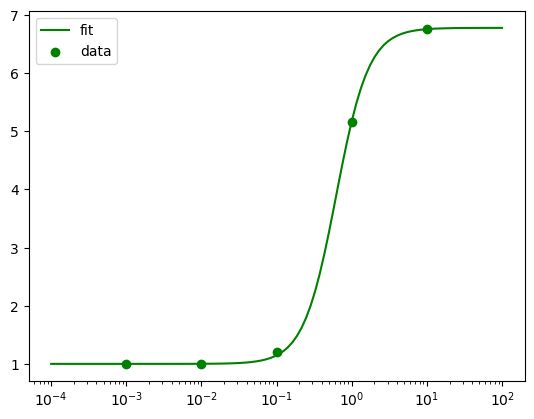

[2.58459968e+05 6.68173997e-06]


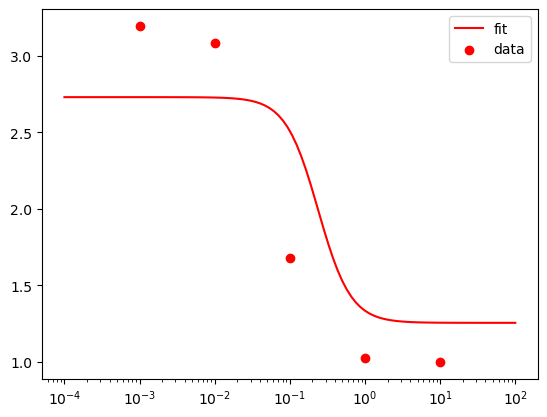

pfit [5.78012645e+00 5.04087363e-01 2.58459968e+05 6.68173997e-06]


In [7]:
from scipy.optimize import curve_fit
# OC14_list = np.logspace(-3,1, 5)

OC14_continuous = np.logspace(-4,2, 100)

def gfp_steadystate(OC14,  Vf,Kvd): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=1
    F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    return F

def rfp_steadystate(F,Ve,Kfe): 
    nvd=2;nfe=1
    muv = 0.0225 ; kv =  0.0183 ;
    E = 1 + Ve*(1/(1+((F/(Kfe+1e-8))**nfe)))
    # E = 1 + Ve*(1/(1+(Kfe/(F+1e-8))**nfe))

    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E


# def rfp_steadystate(OC14,Ve,Kfe): 
#     nvd=2;nfe=8
#     muv = 0.0225 ; kv =  0.0183 ;
#     E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
#     # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

#     return E
def steadystate(OC14,Vf, Kvd,Ve,Kfe):
    nvd=2;nfe=1
    muv = 0.0225 ; kv =  0.0183 ;
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    # E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+(1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))
    F = gfp_steadystate(OC14,  Vf,Kvd)
    E = rfp_steadystate(F,Ve,Kfe)
    return F,E




parametersgreen, covariancegfp = curve_fit(gfp_steadystate, OC14_list, gfpExp_list, p0=[ 3,3], maxfev=1000000000)
# parametersgreen, covariancegfp = curve_fit(rfp_steadystate, OC14_list, gfpExp_list[::-1], p0=[ 3,3], maxfev=1000000000)
print(f'parametersgreen{parametersgreen}')
gfpFit_continous = gfp_steadystate(OC14_continuous, *parametersgreen)
gfpFit = gfp_steadystate(OC14_list, *parametersgreen)
print(f'gfpFit = {gfpFit}')
plt.plot(OC14_continuous,gfpFit_continous , label='fit', c='green')
plt.scatter(OC14_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
plt.show()

parametersred, covariancerfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list, p0=[3,3], maxfev=1000000000)
print(parametersred)
rfpFit = rfp_steadystate(gfpFit, *parametersred)
rfpFit_continous = rfp_steadystate(gfpFit_continous, *parametersred)
plt.plot(OC14_continuous,rfpFit_continous , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
plt.show()

pfit = np.concatenate((parametersgreen, parametersred))
print(f'pfit {pfit}')


[3.96988507e+05 2.16468070e-03]


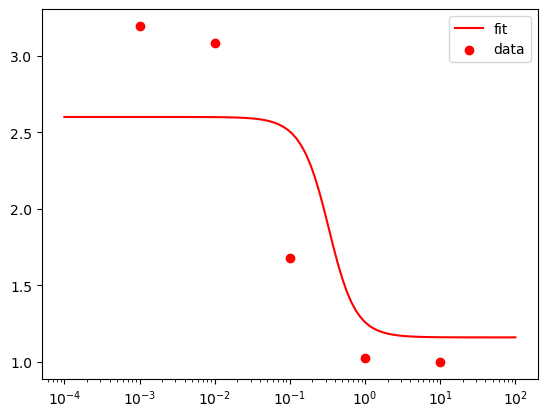

In [29]:

parametersgreen, covariancegfp = curve_fit(rfp_steadystate, gfpFit, rfpExp_list, p0=[ 3,3], maxfev=1000000000)
print(parametersred)
parametersred = [2,2]
rfpFit = rfp_steadystate(gfpFit, *parametersred)
rfpFit_continous = rfp_steadystate(gfpFit_continous, *parametersred)
plt.plot(OC14_continuous,rfpFit_continous , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
plt.show()

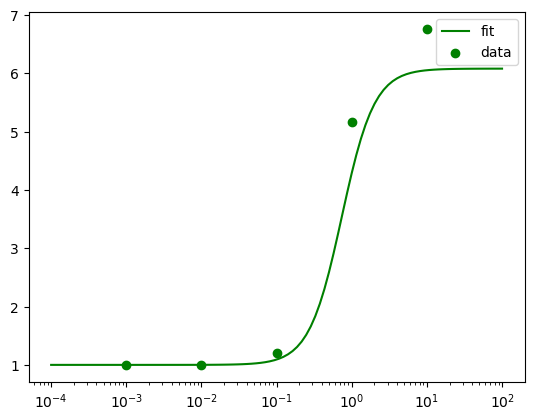

In [62]:
def gfp_steadystate(OC14,  Vf,Kvd): 
    muv = 0.0225 ; kv =  0.0183 ;
    nvd=2;nfe=8
    F = 1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd ))
    return F


pp=[5.78012645, 0.50408736]
pp=[5.08012645, 0.6]
gfpFit = gfp_steadystate(OC14_list, *pp)
gfpFit_continous = gfp_steadystate(OC14_continuous, *pp)

plt.plot(OC14_continuous,gfpFit_continous , label='fit', c='green')
plt.scatter(OC14_list,gfpExp_list , label='data', c='green')
plt.xscale('log')
plt.legend()
plt.show()

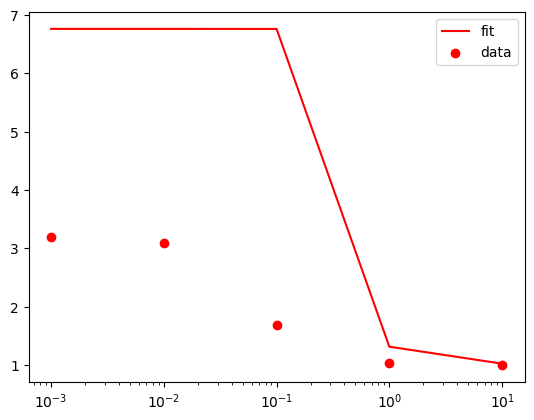

In [65]:

def rfp_steadystate(F,Ve,Kfe): 
    nvd=2;nfe=8
    muv = 0.0225 ; kv =  0.0183 ;
    E = 1 + Ve*(1/(1+(F/(Kfe+1e-8))**nfe))
    # E = 1 + Ve*(1/(1+((1 + Vf*(1/(1+((muv*Kvd)/(kv*OC14 + 1e-8))**nvd )))/(Kfe+1e-8))**nfe))

    return E


pp=[5.760877914951989,3]
rfpFit = rfp_steadystate(gfpFit, *pp)
plt.plot(OC14_list,rfpFit , label='fit', c='red')
plt.scatter(OC14_list,rfpExp_list , label='data', c='red')
plt.xscale('log')
plt.legend()
plt.show()

In [64]:
fx = lambda G,R,Kfe,nfe: (R-1)*(1+(G/((Kfe+1e-8))**nfe))
fx = lambda G,R,Kfe,nfe: (G-1)*(1+(rfpExp_list[-1]/3)**8)
fx(6.76,1,1.86353092e-01, 8)


5.760877914951989

In [40]:
pfit

array([5.78012645e+00, 5.04087363e-01, 1.50842489e+06, 1.85837934e-01])

In [53]:
(rfpExp_list[0]-1)*(1+(gfpExp_list[0]/1)**8)

4.390360429098601

In [38]:
gfpExp_list[-1], rfpExp_list[-1]

(6.761772503943914, 1.0)

In [44]:
1.50842489e+06

1508424.89

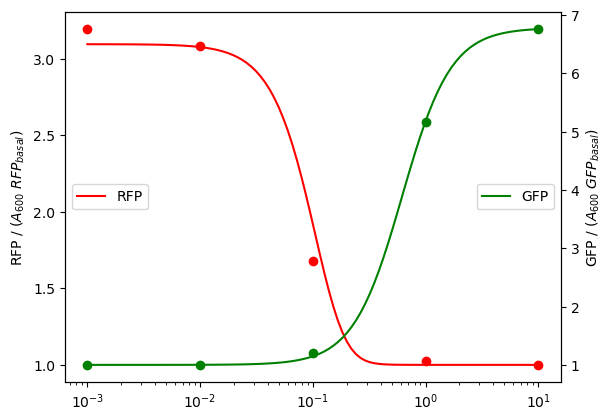

In [167]:
def plotFitvsData(inducer,inducer_continuous, gfpExp_list, rfpExp_list, semGreen, semRed,doseResponseGreen,doseResponseRed,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    # ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    # ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()


# plotFitvsData(OC14_list,OC14_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, rfpFit_continous,gfpFit_continous)
plotFitvsData(OC14_list,OC14_continuous, gfpExp_list, rfpExp_list, semGreen, semRed, gfpFit_continous,rfpFit_continous)

Step 2: Hesian


In [6]:
import jax

from jax.config import config
config.update("jax_debug_nans", True)


# OC14data_new = np.hstack([OC14_list,OC14_list])


def func(p):
    loss_i = 0

    OC14_list=np.logspace(-3,1,5)
    for count,OC14 in enumerate(OC14_list):
      model = steadystate(OC14_list,*p)
   
      loss_i+= ((gfpExp_list[count] - model[0])**2 + (rfpExp_list[count] - model[1])**2)
      # loss_i+= (((gfpExp_list[count] - model[0])**2)/(semGreen.values[count]+1e-8)+ ((rfpExp_list[count] - model[1])**2)/(semRed.values[count]+1e-8))
      # loss_i+= (gfpExp_list[count] - model)**2
    
    return loss_i


p1,p2,p3,p4= pfit
hesian = jax.hessian(func)(jax.numpy.array(*pfit) )
print('hesian')
print(hesian)
hesian = np.array(hesian)
## check if hesian is positive semidefinite (eig must be >0)
# import scipy
# scipy.linalg.eigvals(hesian)
hesian



hesian
[[[ 3.21328315e-08  2.24799686e-03 -9.76998704e-10 -6.34413511e-02]
  [ 2.24799663e-03 -7.73382559e-02  2.24054855e-08  1.45489872e+00]
  [-9.76998815e-10  2.24054855e-08  2.02322898e-11  2.01728521e-03]
  [-6.34413585e-02  1.45489883e+00  2.01728498e-03  1.25282016e+05]]

 [[ 3.10859643e-04  2.10244045e-01 -9.47958583e-08 -6.15556288e+00]
  [ 2.10244060e-01 -7.31147194e+00  2.17339084e-06  1.41128998e+02]
  [-9.47958583e-08  2.17339061e-06  1.97561568e-11  1.96267338e-03]
  [-6.15556335e+00  1.41128998e+02  1.96267338e-03  1.21928141e+05]]

 [[ 9.74498838e-02 -1.70246482e+00 -3.70191174e-07 -2.40383911e+01]
  [-1.70246422e+00  3.28747330e+01  8.27420263e-06  5.37285828e+02]
  [-3.70191174e-07  8.27420263e-06  2.26572624e-12  9.00237355e-05]
  [-2.40383911e+01  5.37285828e+02  9.00237064e-05  6.30917969e+03]]

 [[ 5.21967745e+00 -5.03127594e+01  3.07313758e-11  1.99554279e-03]
  [-5.03127670e+01  2.33005127e+02 -1.95587851e-10 -1.27005018e-02]
  [ 3.07313758e-11 -1.95587824e-10 

array([[[ 3.21328315e-08,  2.24799686e-03, -9.76998704e-10,
         -6.34413511e-02],
        [ 2.24799663e-03, -7.73382559e-02,  2.24054855e-08,
          1.45489872e+00],
        [-9.76998815e-10,  2.24054855e-08,  2.02322898e-11,
          2.01728521e-03],
        [-6.34413585e-02,  1.45489883e+00,  2.01728498e-03,
          1.25282016e+05]],

       [[ 3.10859643e-04,  2.10244045e-01, -9.47958583e-08,
         -6.15556288e+00],
        [ 2.10244060e-01, -7.31147194e+00,  2.17339084e-06,
          1.41128998e+02],
        [-9.47958583e-08,  2.17339061e-06,  1.97561568e-11,
          1.96267338e-03],
        [-6.15556335e+00,  1.41128998e+02,  1.96267338e-03,
          1.21928141e+05]],

       [[ 9.74498838e-02, -1.70246482e+00, -3.70191174e-07,
         -2.40383911e+01],
        [-1.70246422e+00,  3.28747330e+01,  8.27420263e-06,
          5.37285828e+02],
        [-3.70191174e-07,  8.27420263e-06,  2.26572624e-12,
          9.00237355e-05],
        [-2.40383911e+01,  5.37285828e+

In [16]:
func(pfit)

0.009611438085700296

In [17]:
pfit

array([5.78012642e+00, 5.04087349e-01, 1.44745410e+06, 1.86798858e-01])

In [37]:
pfit2 = np.array([5.78012642e+00, 5.04087350e-01, 1.44745410e+06,  1.86798858e-01])
func(pfit2)
if func(pfit2) < func(pfit):
  print('improved')
print(func(pfit2))

0.009611438448147646


In [6]:
from scipy.stats import multivariate_normal
from tqdm import tqdm 
C14_continuous = np.logspace(-3,1,100)
covarianceM = np.linalg.inv(hesian)
var = multivariate_normal(mean=pfit, cov=covarianceM)
pfit_hesian = var.rvs(size=100)

fig,ax = plt.subplots()
# ax2=ax.twinx()
for p in tqdm(pfit_hesian):
    # if np.all(p>0):
    # steadystate(OC14_continuous, *p)
    # ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='green', alpha=0.1)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='red', alpha=1)
    # ax.scatter(OC14_list,gfpExp_list , label='data', c='green')
    ax.scatter(OC14_list,rfpExp_list , label='data', c='red')
    plt.xscale('log')
        # print(func(p), p)
pfit_hesian

print(pfit)

LinAlgError: singular matrix

In [ ]:
func(pfit)

0.008005593524069363

In [ ]:
print([func(pfit_hesian[n]) for n in range(10)])

[0.6436585686069085, 10.341795271463448, 9.794197480852423, 9.964542429763496, 6190.543912774329, 10.891432621644965, 0.1447426723711059, 9.820451982765272, 1692.5614206947498, 11.197840561108407]


In [ ]:
pfit

array([5.78012642, 0.50408735, 8.50846374, 0.89736572])

In [ ]:
print(pfit_hesian)

[[ 5.20607764e+00  3.27654468e-01  7.55585923e+00  9.15832626e-01]
 [ 5.81850876e+00  7.03577518e-01  9.21803888e+01 -2.74283817e-01]
 [ 5.87024574e+00  4.32526820e-01  5.70351509e+01  2.57629489e-01]
 [ 5.34425284e+00  5.26015468e-01  4.64273431e+01  3.62501116e-01]
 [ 5.89673316e+00  5.15707790e-01 -4.43230667e+01  1.65084593e+00]
 [ 6.30418982e+00  8.11616757e-01  6.74300953e+01  7.89808041e-02]
 [ 5.87625791e+00  5.84188642e-01  9.40253811e+00  8.81159530e-01]
 [ 5.44639618e+00  4.88905110e-01 -1.20434013e-02  1.00510068e+00]
 [ 6.67962588e+00  6.18200905e-01 -2.36367235e+01  1.36470977e+00]
 [ 6.87460844e+00  8.01452484e-01  7.39637382e+01 -5.94219605e-02]
 [ 6.10119340e+00  3.70148321e-01 -4.87263573e+01  1.68416542e+00]
 [ 6.45878913e+00  7.51190486e-01  4.96718998e+01  3.36842473e-01]
 [ 6.58449058e+00  9.14962862e-01  1.02917908e+02 -4.44118289e-01]
 [ 5.19064109e+00  4.34264364e-01 -4.02463658e+01  1.59182877e+00]
 [ 4.67092761e+00  1.30377843e-01 -4.47755641e+01  1.61416001e

In [ ]:
func(pfit_hesian[0])

0.6436585686069085

In [ ]:
hesian
np.linalg.eigvals(hesian)

array([1.3722671e+03, 6.0855640e+01, 2.0604513e+00, 4.0332685e-04],
      dtype=float32)

In [ ]:
var = multivariate_normal(mean=pfit, cov=hesian)
pfit_hesian = var.rvs(size=100)

100%|██████████| 100/100 [00:00<00:00, 725.53it/s]


[5.78012642 0.50408735 8.50846374 0.89736572]


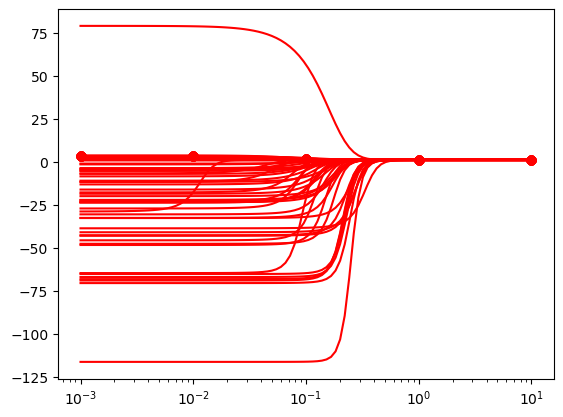

In [ ]:
from scipy.stats import multivariate_normal
from tqdm import tqdm 
C14_continuous = np.logspace(-3,1,100)
covarianceM = np.linalg.inv(hesian)
var = multivariate_normal(mean=pfit, cov=covarianceM)
pfit_hesian = var.rvs(size=100)

fig,ax = plt.subplots()
# ax2=ax.twinx()
for p in tqdm(pfit_hesian):
    # if np.all(p>0):
    # steadystate(OC14_continuous, *p)
    # ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[0], c='green', alpha=0.1)
    ax.plot(OC14_continuous, steadystate(OC14_continuous, *p)[1], c='red', alpha=1)
    # ax.scatter(OC14_list,gfpExp_list , label='data', c='green')
    ax.scatter(OC14_list,rfpExp_list , label='data', c='red')
    plt.xscale('log')
        # print(func(p), p)
pfit_hesian

print(pfit)

In [ ]:
pfit_hesian

array([[ 6.73259995e+00,  5.69734403e-01,  1.92758378e+01,
         7.79727492e-01],
       [ 6.01923725e+00,  4.91758887e-01,  1.11077492e+01,
         8.36331040e-01],
       [ 6.36542575e+00,  6.34433444e-01,  2.40367454e+01,
         7.21713400e-01],
       [ 6.00893711e+00,  6.96897152e-01,  8.41579368e+01,
        -1.59134993e-01],
       [ 6.87466324e+00,  5.38186841e-01,  2.63475801e+01,
         6.80048120e-01],
       [ 6.74405962e+00,  5.86301307e-01, -2.43432277e+01,
         1.35874788e+00],
       [ 5.57071350e+00,  5.28889224e-01,  1.01582085e+01,
         8.76048672e-01],
       [ 6.08141381e+00,  3.71407306e-01, -2.56894893e+01,
         1.37343972e+00],
       [ 4.78498404e+00,  5.34638649e-01,  2.87826759e+01,
         6.17828613e-01],
       [ 5.48453743e+00,  2.31237899e-01, -2.50567975e+01,
         1.41203629e+00],
       [ 5.60775119e+00,  5.89391534e-01, -4.44053144e+01,
         1.62866619e+00],
       [ 6.42731586e+00,  5.80982760e-01,  4.07703685e+01,
      

In [ ]:
pfit

array([5.78012642, 0.50408735, 8.50846374, 0.89736572])

In [ ]:
print(func(pfit))
print(func(np.array([5.78012642, 0.50408735, 12.50, 0.89736572])))
print(func(np.array([5.78012642, 0.50408735, 4.50, 0.89736572])))

0.008005593524069363
2.12425703577223
2.142245223445773


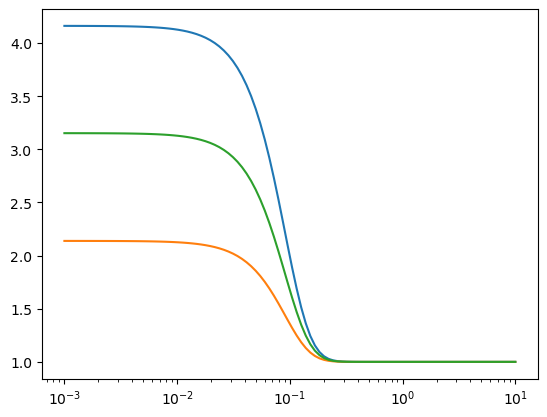

In [ ]:
pfit2 = np.array([5.78012642, 0.50408735, 12.50, 0.89736572])
ss = steadystate(OC14_continuous,*pfit2 )
plt.plot(OC14_continuous, ss[1])

pfit2 = np.array([5.78012642, 0.50408735, 4.50, 0.89736572])
ss = steadystate(OC14_continuous,*pfit2 )
plt.plot(OC14_continuous, ss[1])
ss = steadystate(OC14_continuous,*pfit )
plt.plot(OC14_continuous, ss[1])
plt.xscale('log')

In [ ]:
x =np.array([5.78012642, 0.50408735,8.50846374 , 0.89736572])
y = multivariate_normal.pdf(x, mean=pfit, cov=covarianceM);

y

0.2110137543893079

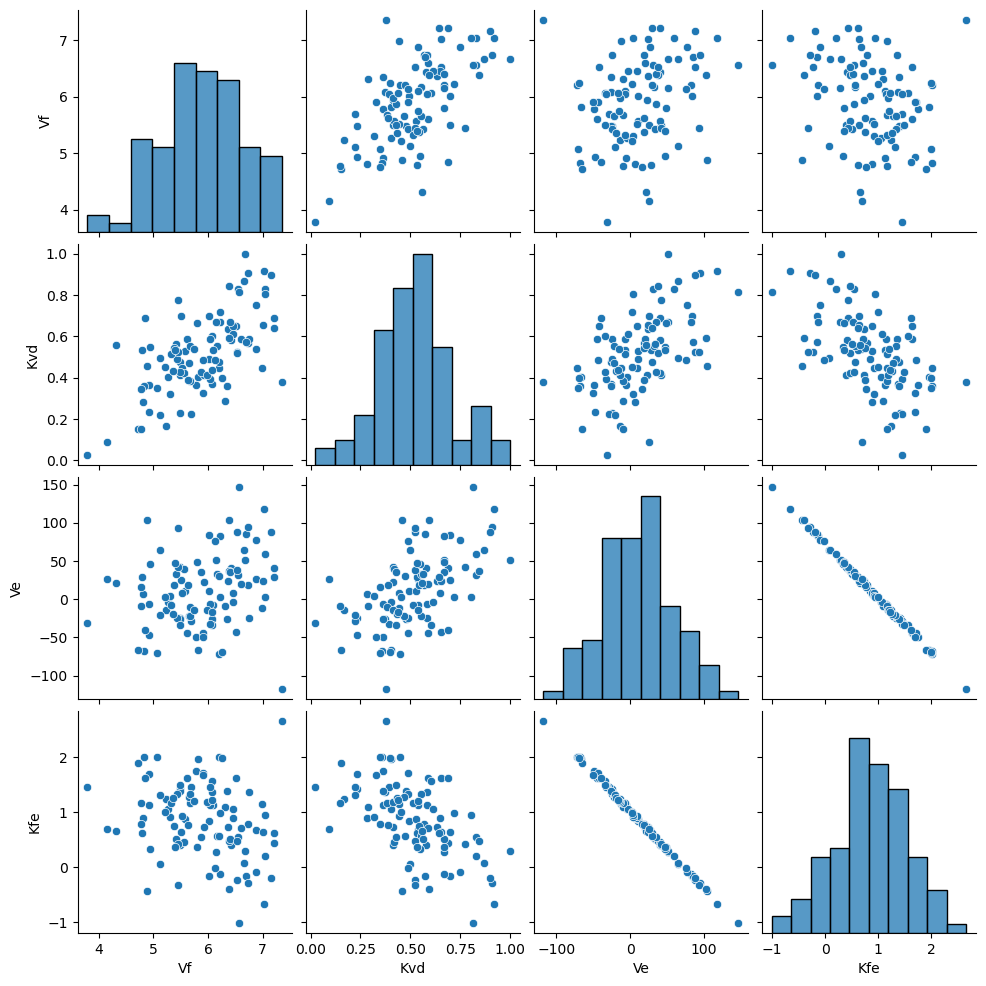

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(pfit_hesian, columns=['Vf', 'Kvd', 'Ve', 'Kfe'])
sns.pairplot(df)

In [ ]:
covarianceM = np.linalg.inv(hesian)

In [ ]:
plotDoseResponsevsData(OC14_list,OC14_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, rfpFit_continous, gfpFit_continous)

NameError: name 'plotDoseResponsevsData' is not defined

## Generate parameter set